####  DATA VISUALIZATION WITH SEABORN, PLOTLY AND MATPLOTLIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Bring your data in here
HR_data = pd.read_csv('cleaned_data.csv')

#### Bar Chart

In [3]:
# To just check the coloums that we have inside the dataset
HR_data.columns

Index(['Unnamed: 0', 'Posted On', 'BHK', 'Rent', 'Size', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'house_floor', 'no_floor'],
      dtype='object')

<Axes: xlabel='City', ylabel='Rent'>

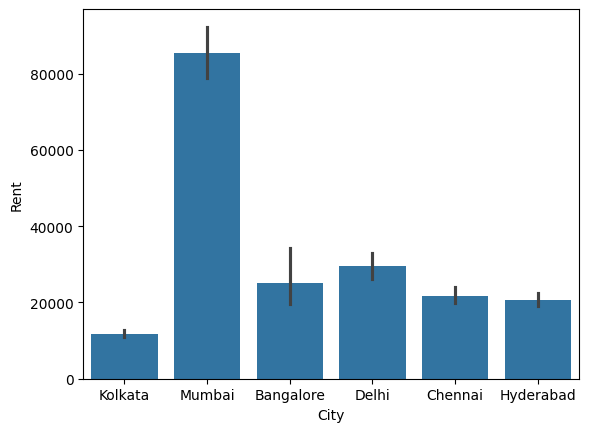

In [4]:
#  Constructing a bar chart of rent/city

sns.barplot(data = HR_data, x = 'City', y= 'Rent')

<Axes: xlabel='City', ylabel='Rent'>

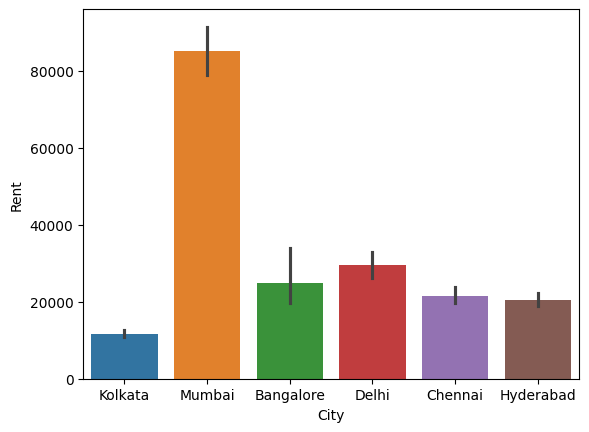

In [5]:
# to get different colours to the columns
sns.barplot(data = HR_data, x = 'City', y= 'Rent', hue = 'City')

Text(0.5, 1.0, 'Bar Chart Of Rent in each Cities')

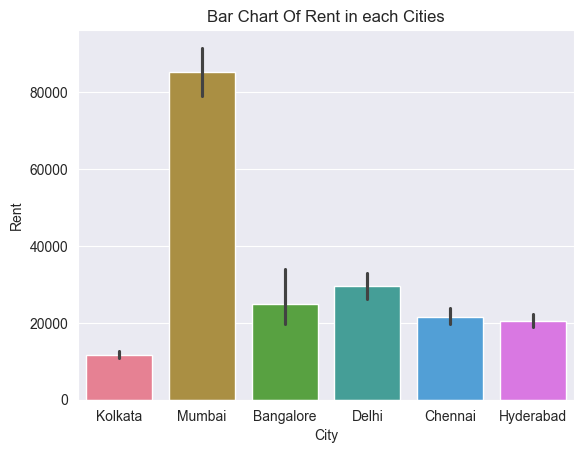

In [6]:
# To apply different formats to our visualization - customizing

sns.set_style('darkgrid')
sns.set_palette('husl')

sns.barplot(data = HR_data, x = 'City', y= 'Rent', hue = 'City')

# adding title to our chat
plt.title('Bar Chart Of Rent in each Cities')

Text(0.5, 1.0, 'Scatter Plot of Size Vs Rent')

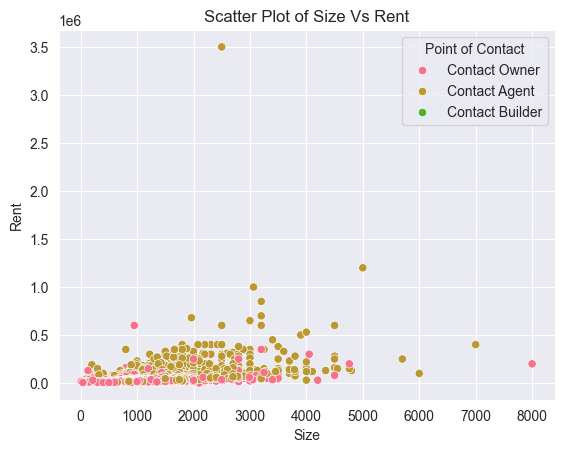

In [7]:
# scattered plot for seaborn
sns.scatterplot(data=HR_data,x='Size',y='Rent',hue='Point of Contact')
plt.title('Scatter Plot of Size Vs Rent')

# seaborn does not have pie chart

#### SESSION TWO

In [8]:
# Plottong a histogram

px.histogram(data_frame=HR_data, x='City',y='Rent')


In [9]:

# adding colour formatting to your histogram - using poin of contact to split them into different 
# categories and you can filter them by each colour too by clicking on it
px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact')

In [10]:

# this is to help us seperate it, if we dont want our chat to be stacked---we want it to be clustered
px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact',barmode='group')

In [11]:
# this helps us to calculate the average of the rent spent in each city, it gives the default function of sum but we 
# can change it to whatever we like
px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact',barmode='group',
histfunc = 'avg', title = 'Histogram Chart of Rent in each city')

<Axes: xlabel='Rent', ylabel='Count'>

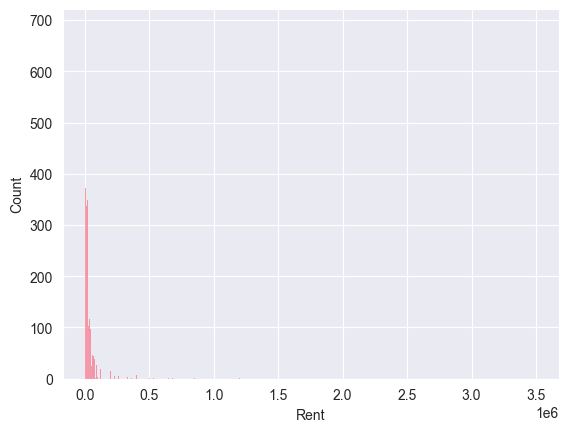

In [12]:
# Plotting histogram using seaborn.... this has X alone as the data its going to require
sns.histplot(data=HR_data, x = 'Rent')

<Axes: xlabel='Rent', ylabel='Count'>

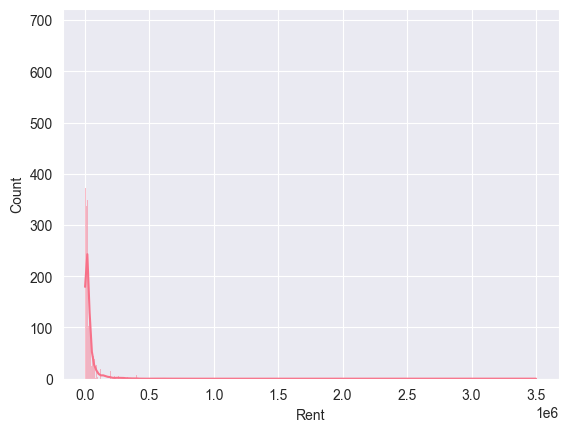

In [13]:
sns.histplot(data=HR_data, x = 'Rent',kde=True)

<Axes: xlabel='Rent', ylabel='Count'>

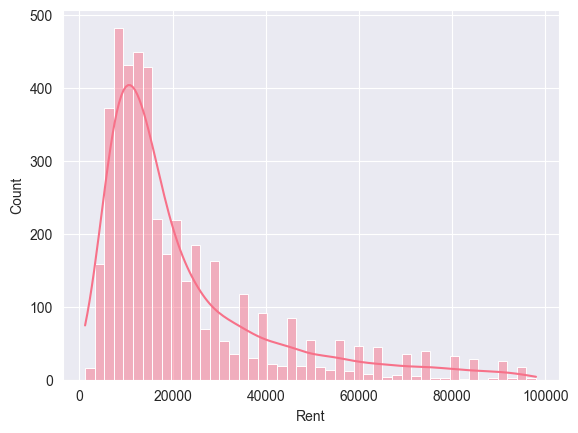

In [14]:

# this is to help us display the rent lesser than 100000 - show us the distribution of the rent spread
sns.histplot(data=HR_data[HR_data['Rent']<100000], x = 'Rent',kde=True)

In [15]:
# plotting a scatter plot using plotly
px.scatter(data_frame=HR_data, x='Size', y='Rent',title='Scatter Plot of Size VS Rent',color='Point of Contact')

#### Bar Chart for Plotly

* Note: Different types of charts have their methods which are very peculiar to their name and all other things inn it.

In [16]:
px.bar(data_frame=HR_data,x='City',y='Rent')

# ployly gives you the opportunity to download your chart as a picture, and some other special functions

# the splittin bars also gave us good information about how each enviroment id populated

#### Pie Chart

In [17]:
# plotly

px.pie(data_frame=HR_data,values='Rent',names='City',title='Pie Chart of Rent in each city')

Text(0.5, 1.0, 'Pie Chart of Rent in each city')

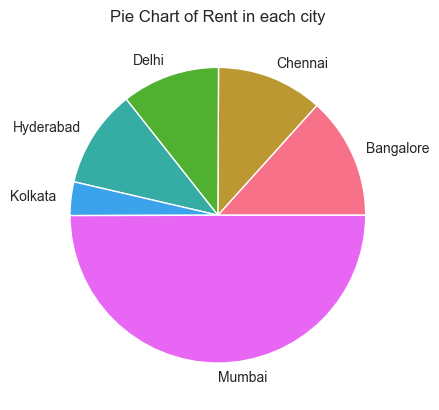

In [18]:
# Matplotlib

# temp_data is a new variable that we want to use to calculate the rent for each city.
# in the hr_data computation, you will notice that we did not call the column name by their index which we have always
#  done in python, we can call them with their column name because we loaded in the data as a pandas method.
# Hence, the reason why we have to reset our index

temp_data = HR_data[['City','Rent']].groupby(['City']).sum()
temp_data.reset_index(inplace=True)

plt.pie(data=temp_data, x='Rent', labels='City')
plt.title('Pie Chart of Rent in each city')

<Axes: xlabel='Rent'>

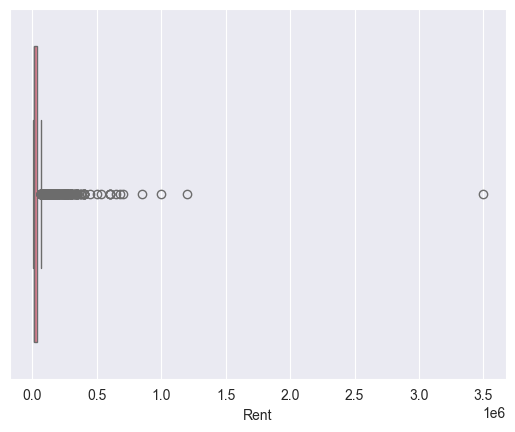

In [19]:
sns.boxplot(data=HR_data,x='Rent')

<Axes: xlabel='Rent'>

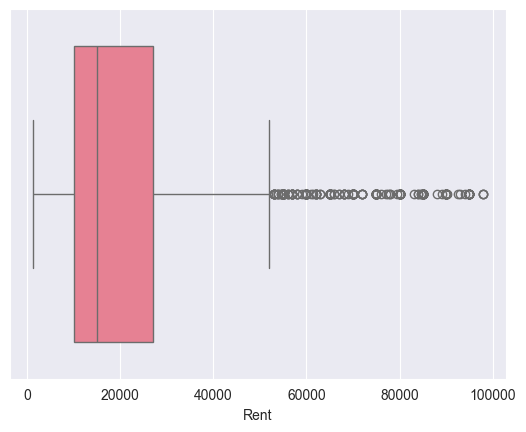

In [20]:
sns.boxplot(data=HR_data[HR_data['Rent']<100000],x='Rent')

In [21]:
px.box(data_frame=HR_data,x='Rent')

In [22]:
px.box(data_frame=HR_data[HR_data['Rent'] < 100000], x = 'Rent')

<Axes: ylabel='Rent'>

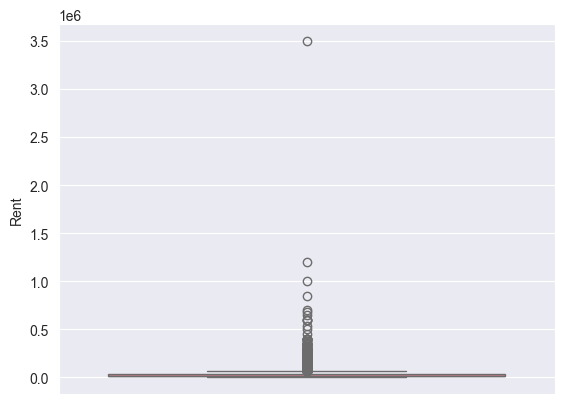

In [23]:
sns.boxplot(data=HR_data,y='Rent')

<Axes: xlabel='City', ylabel='Rent'>

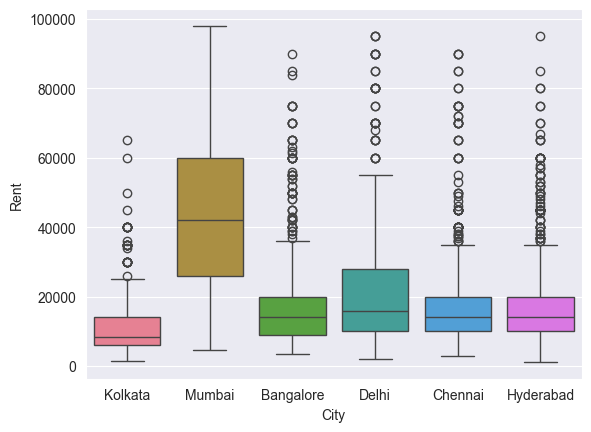

In [24]:
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000],y='Rent',x='City',hue='City')

In [25]:
px.box(data_frame=HR_data,y='Rent')

In [26]:
px.box(data_frame=HR_data[HR_data['Rent'] < 100000], y='Rent',x='City',color='City')

#### Multiple Plot

<Axes: xlabel='City', ylabel='count'>

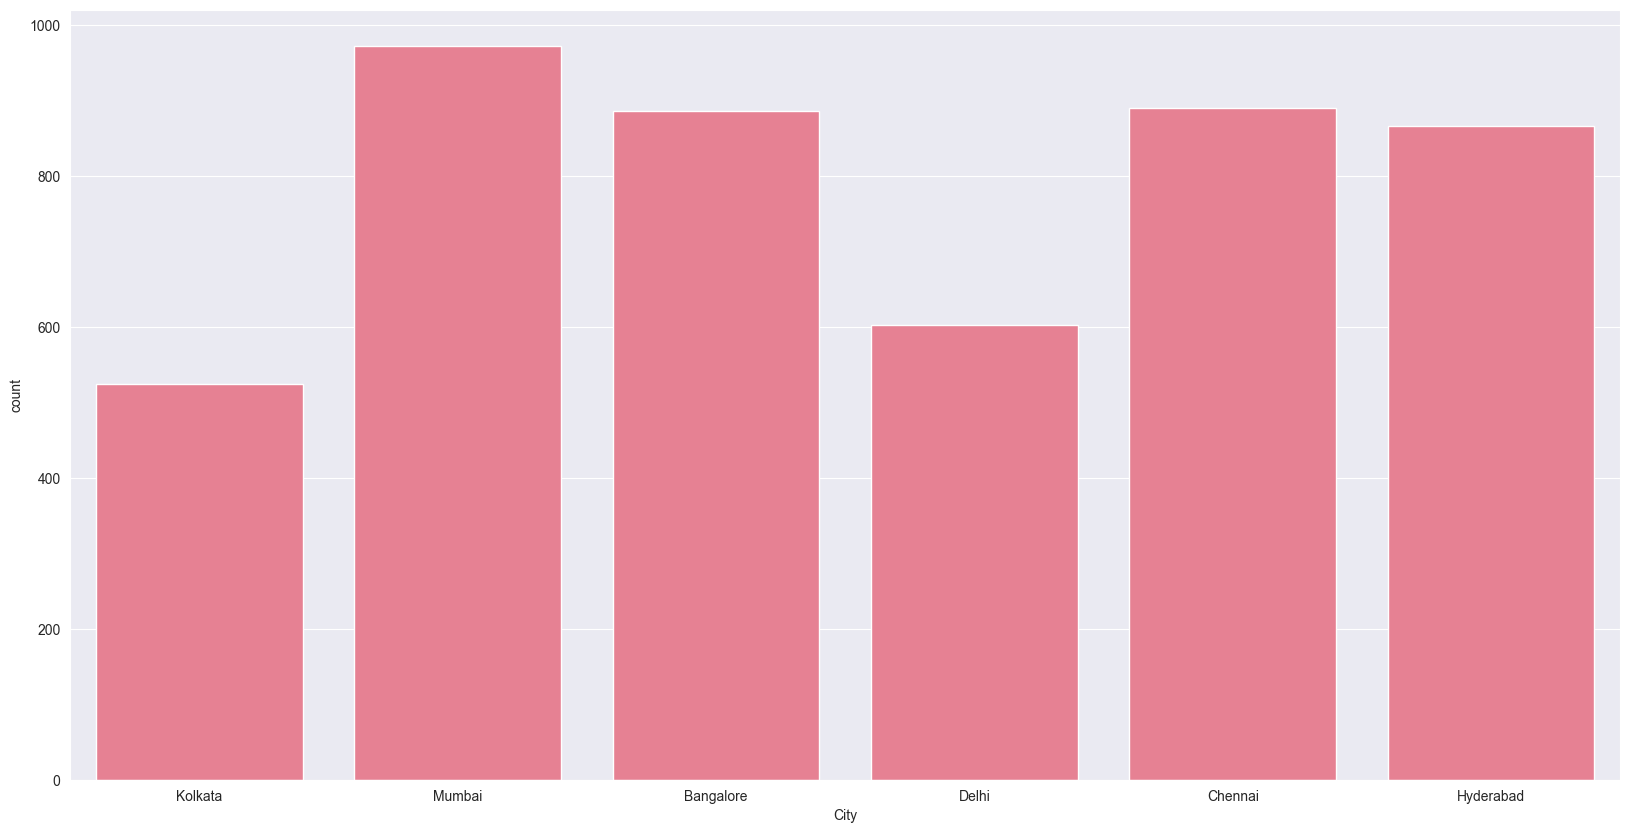

In [27]:
# this is plotting a contplot, fig means we are trying to partition our fifure size which is the background to determine
# the length and the breathe of the figure zize.
fig = plt.figure(figsize=(20,10))
sns.countplot(data=HR_data, x = 'City')

<Axes: xlabel='Point of Contact', ylabel='count'>

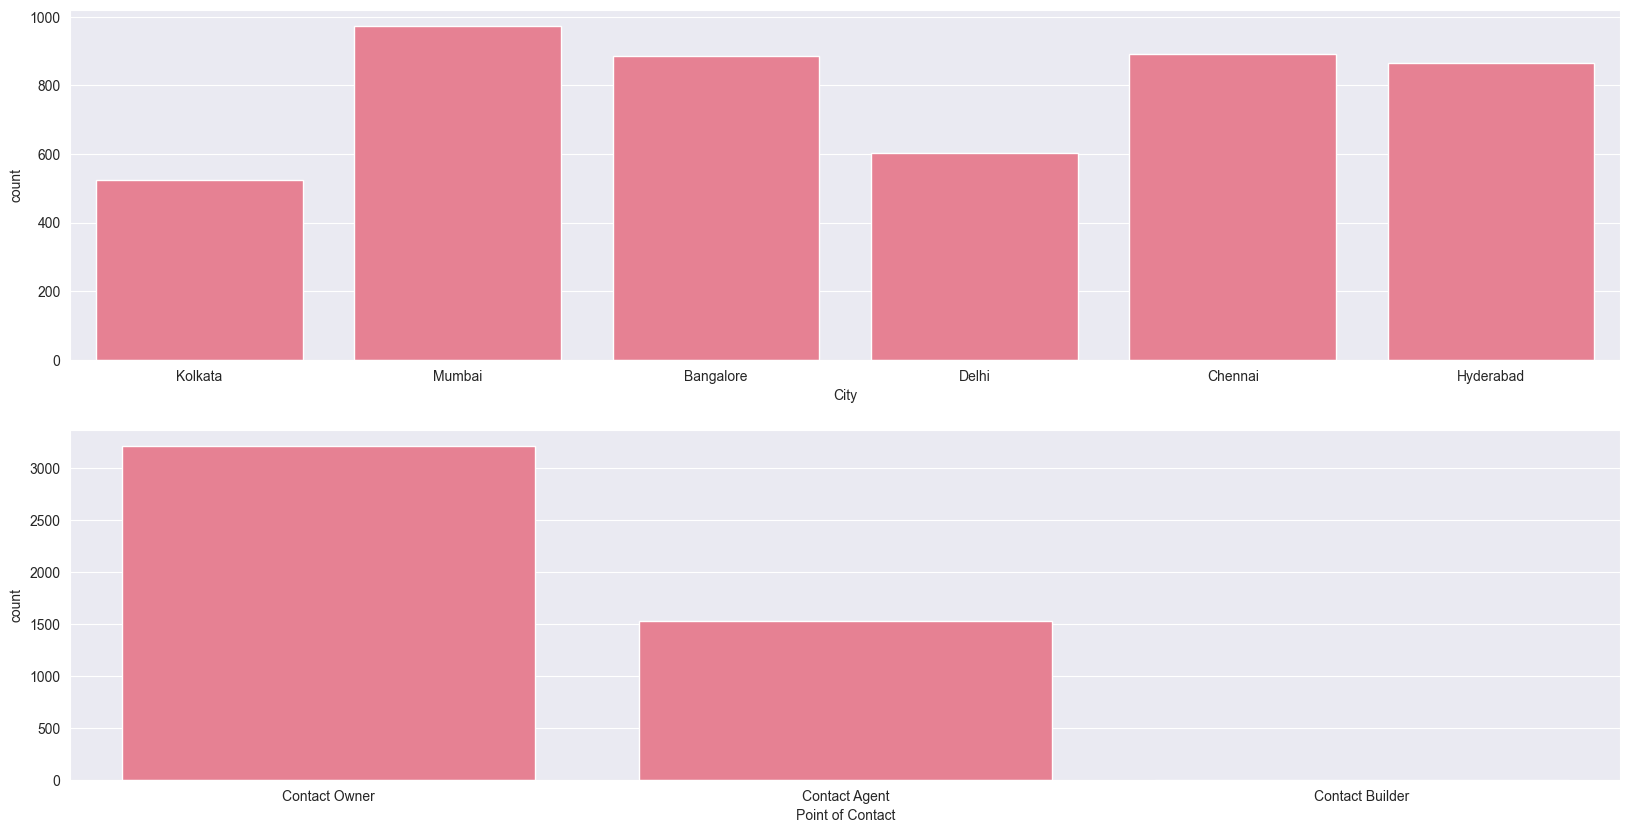

In [28]:
# the first one is always y axis and the second is x axis, this method is plotting two chats in a particular plot
sns.set_style('darkgrid')
sns.set_palette('husl')
fig, axes = plt.subplots(2,1, figsize=(20,10))

sns.countplot(data=HR_data, x = 'City', ax=axes[0])
sns.countplot(data=HR_data, x='Point of Contact', ax=axes[1])

<Axes: xlabel='Rent', ylabel='Count'>

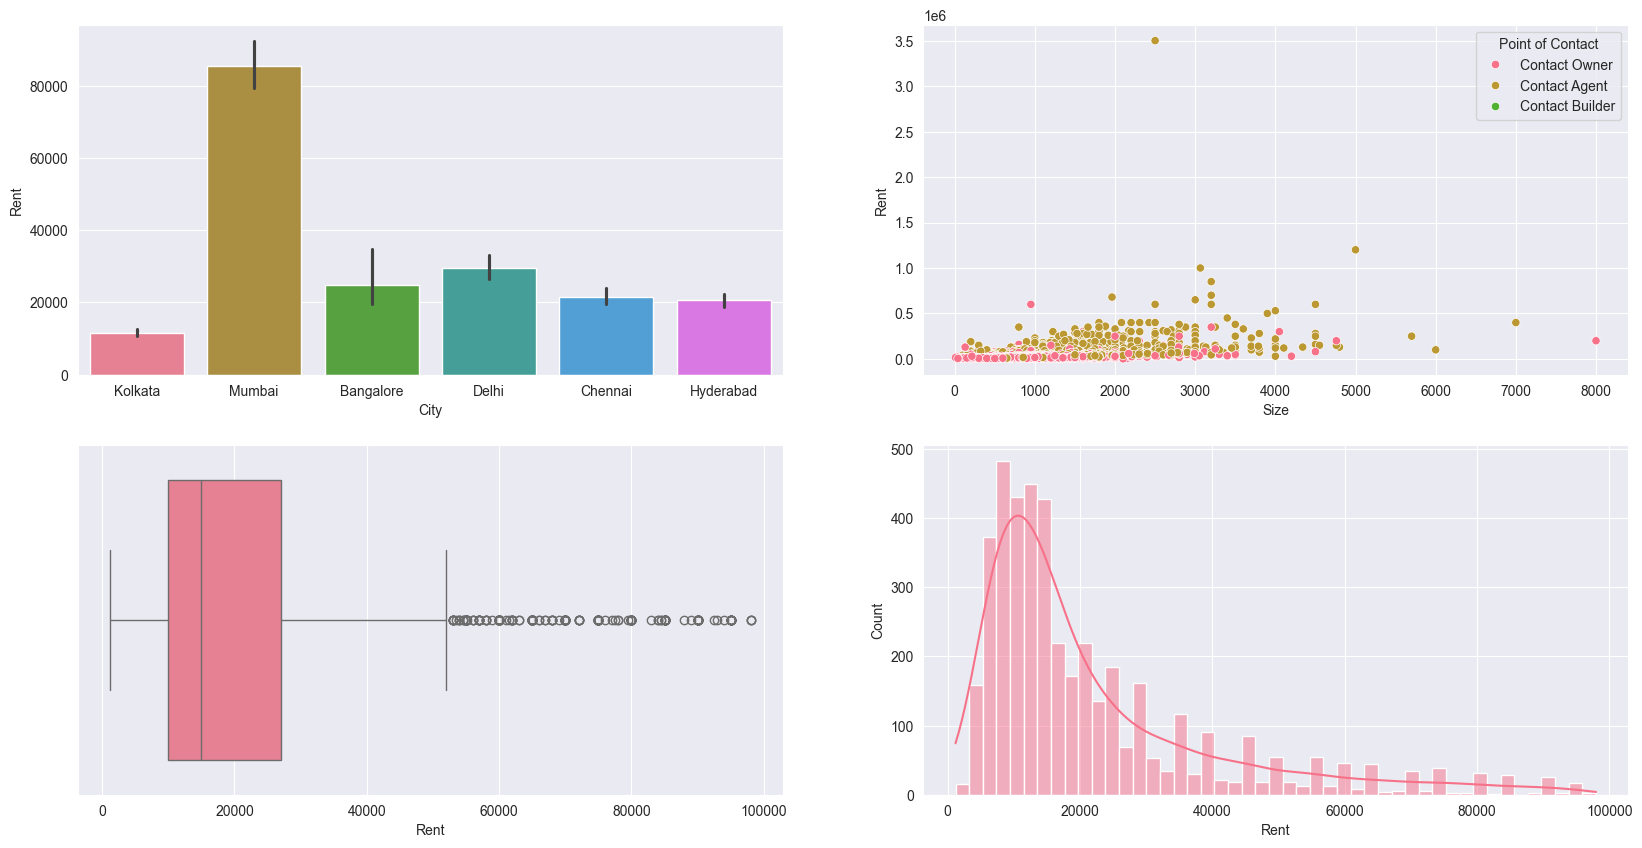

In [29]:
# 
sns.set_style('darkgrid')
sns.set_palette('husl')
fig, axes = plt.subplots(2,2, figsize=(20,10)) #Y-AXIS, X-AXIS

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0])
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1])
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[1,0])
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,1])

In [30]:
# assignment and also add title to it
# plot 3,3 chart ... 3 on x and y = 6
# plot 3,3,3 equals to 9

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In this case, [0, 0.03, 1, 0.95] means:

left = 0: No padding on the left.
bottom = 0.03: 3% of the figure height as padding at the bottom.
right = 1: No padding on the right.
top = 0.95: 5% of the figure height reserved at the top (thus 95% is available for the subplots).
This adjustment ensures that the main title (fig.suptitle) has enough space at the top without overlapping with the subplots.

Text(0.5, 1.0, 'My Countplot II')

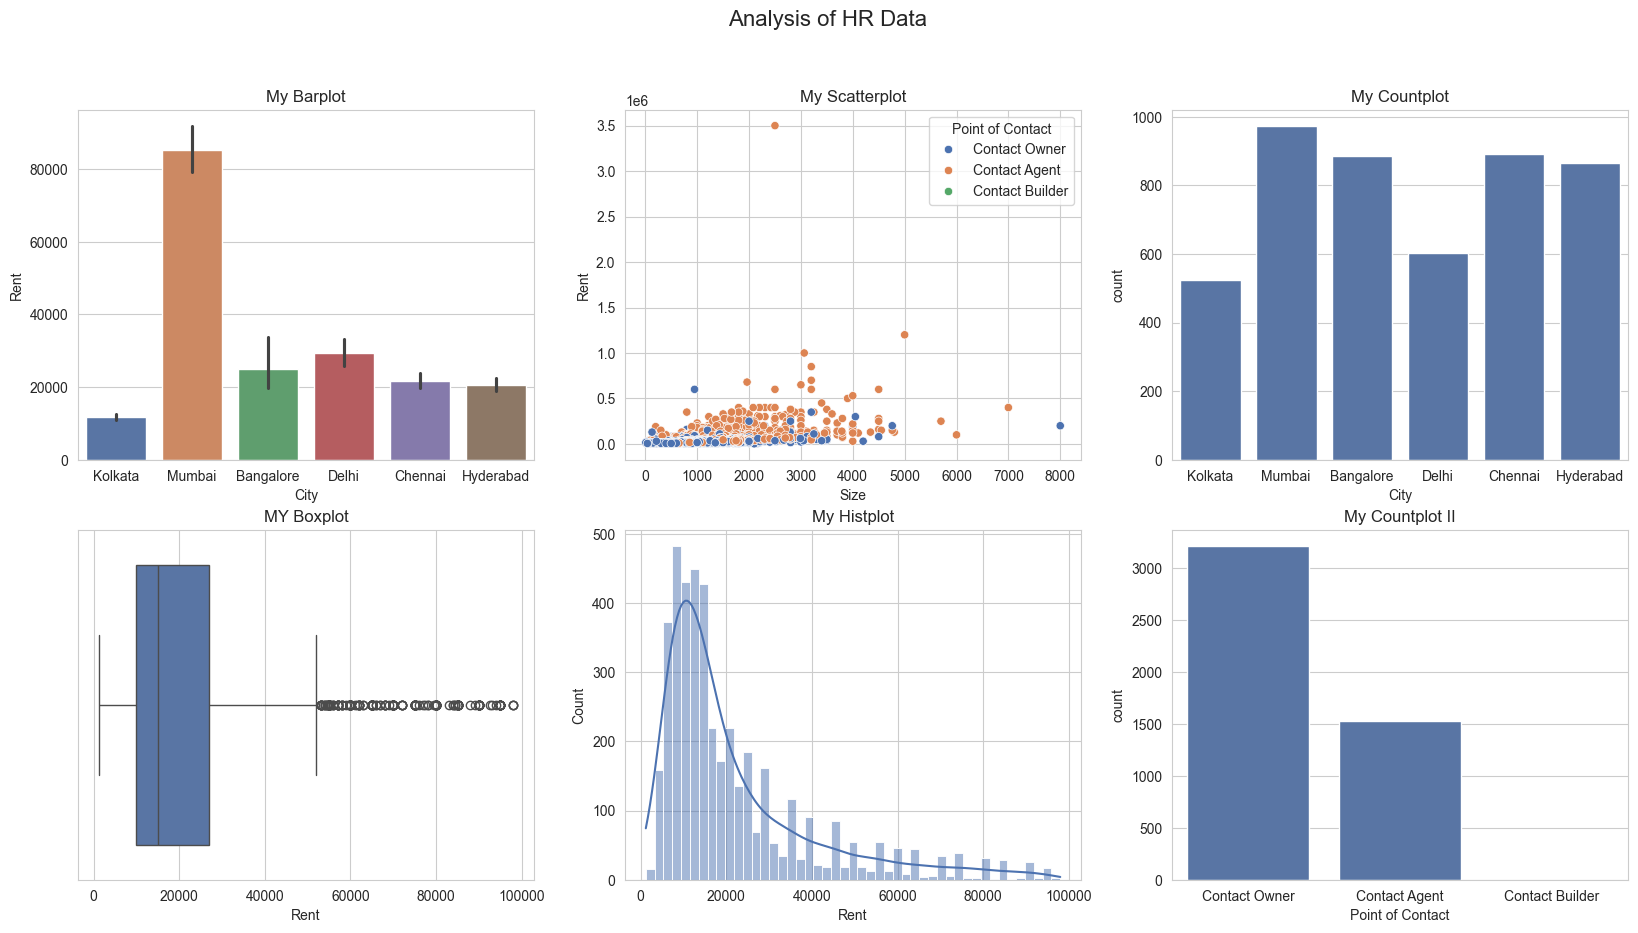

In [31]:
sns.set_style('whitegrid')
sns.set_palette('deep')
fig, axes = plt.subplots(2,3, figsize=(20,10)) #Y-AXIS, X-AXIS
fig.suptitle('Analysis of HR Data', fontsize=16)

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0]).set_title('My Barplot')
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1]).set_title('My Scatterplot')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[1,0]).set_title('MY Boxplot')
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,1]).set_title('My Histplot')
sns.countplot(data=HR_data, x = 'City', ax=axes[0,2]).set_title('My Countplot')
sns.countplot(data=HR_data, x='Point of Contact', ax=axes[1,2]).set_title('My Countplot II')




Text(0.5, 1.0, 'My Barplot II')

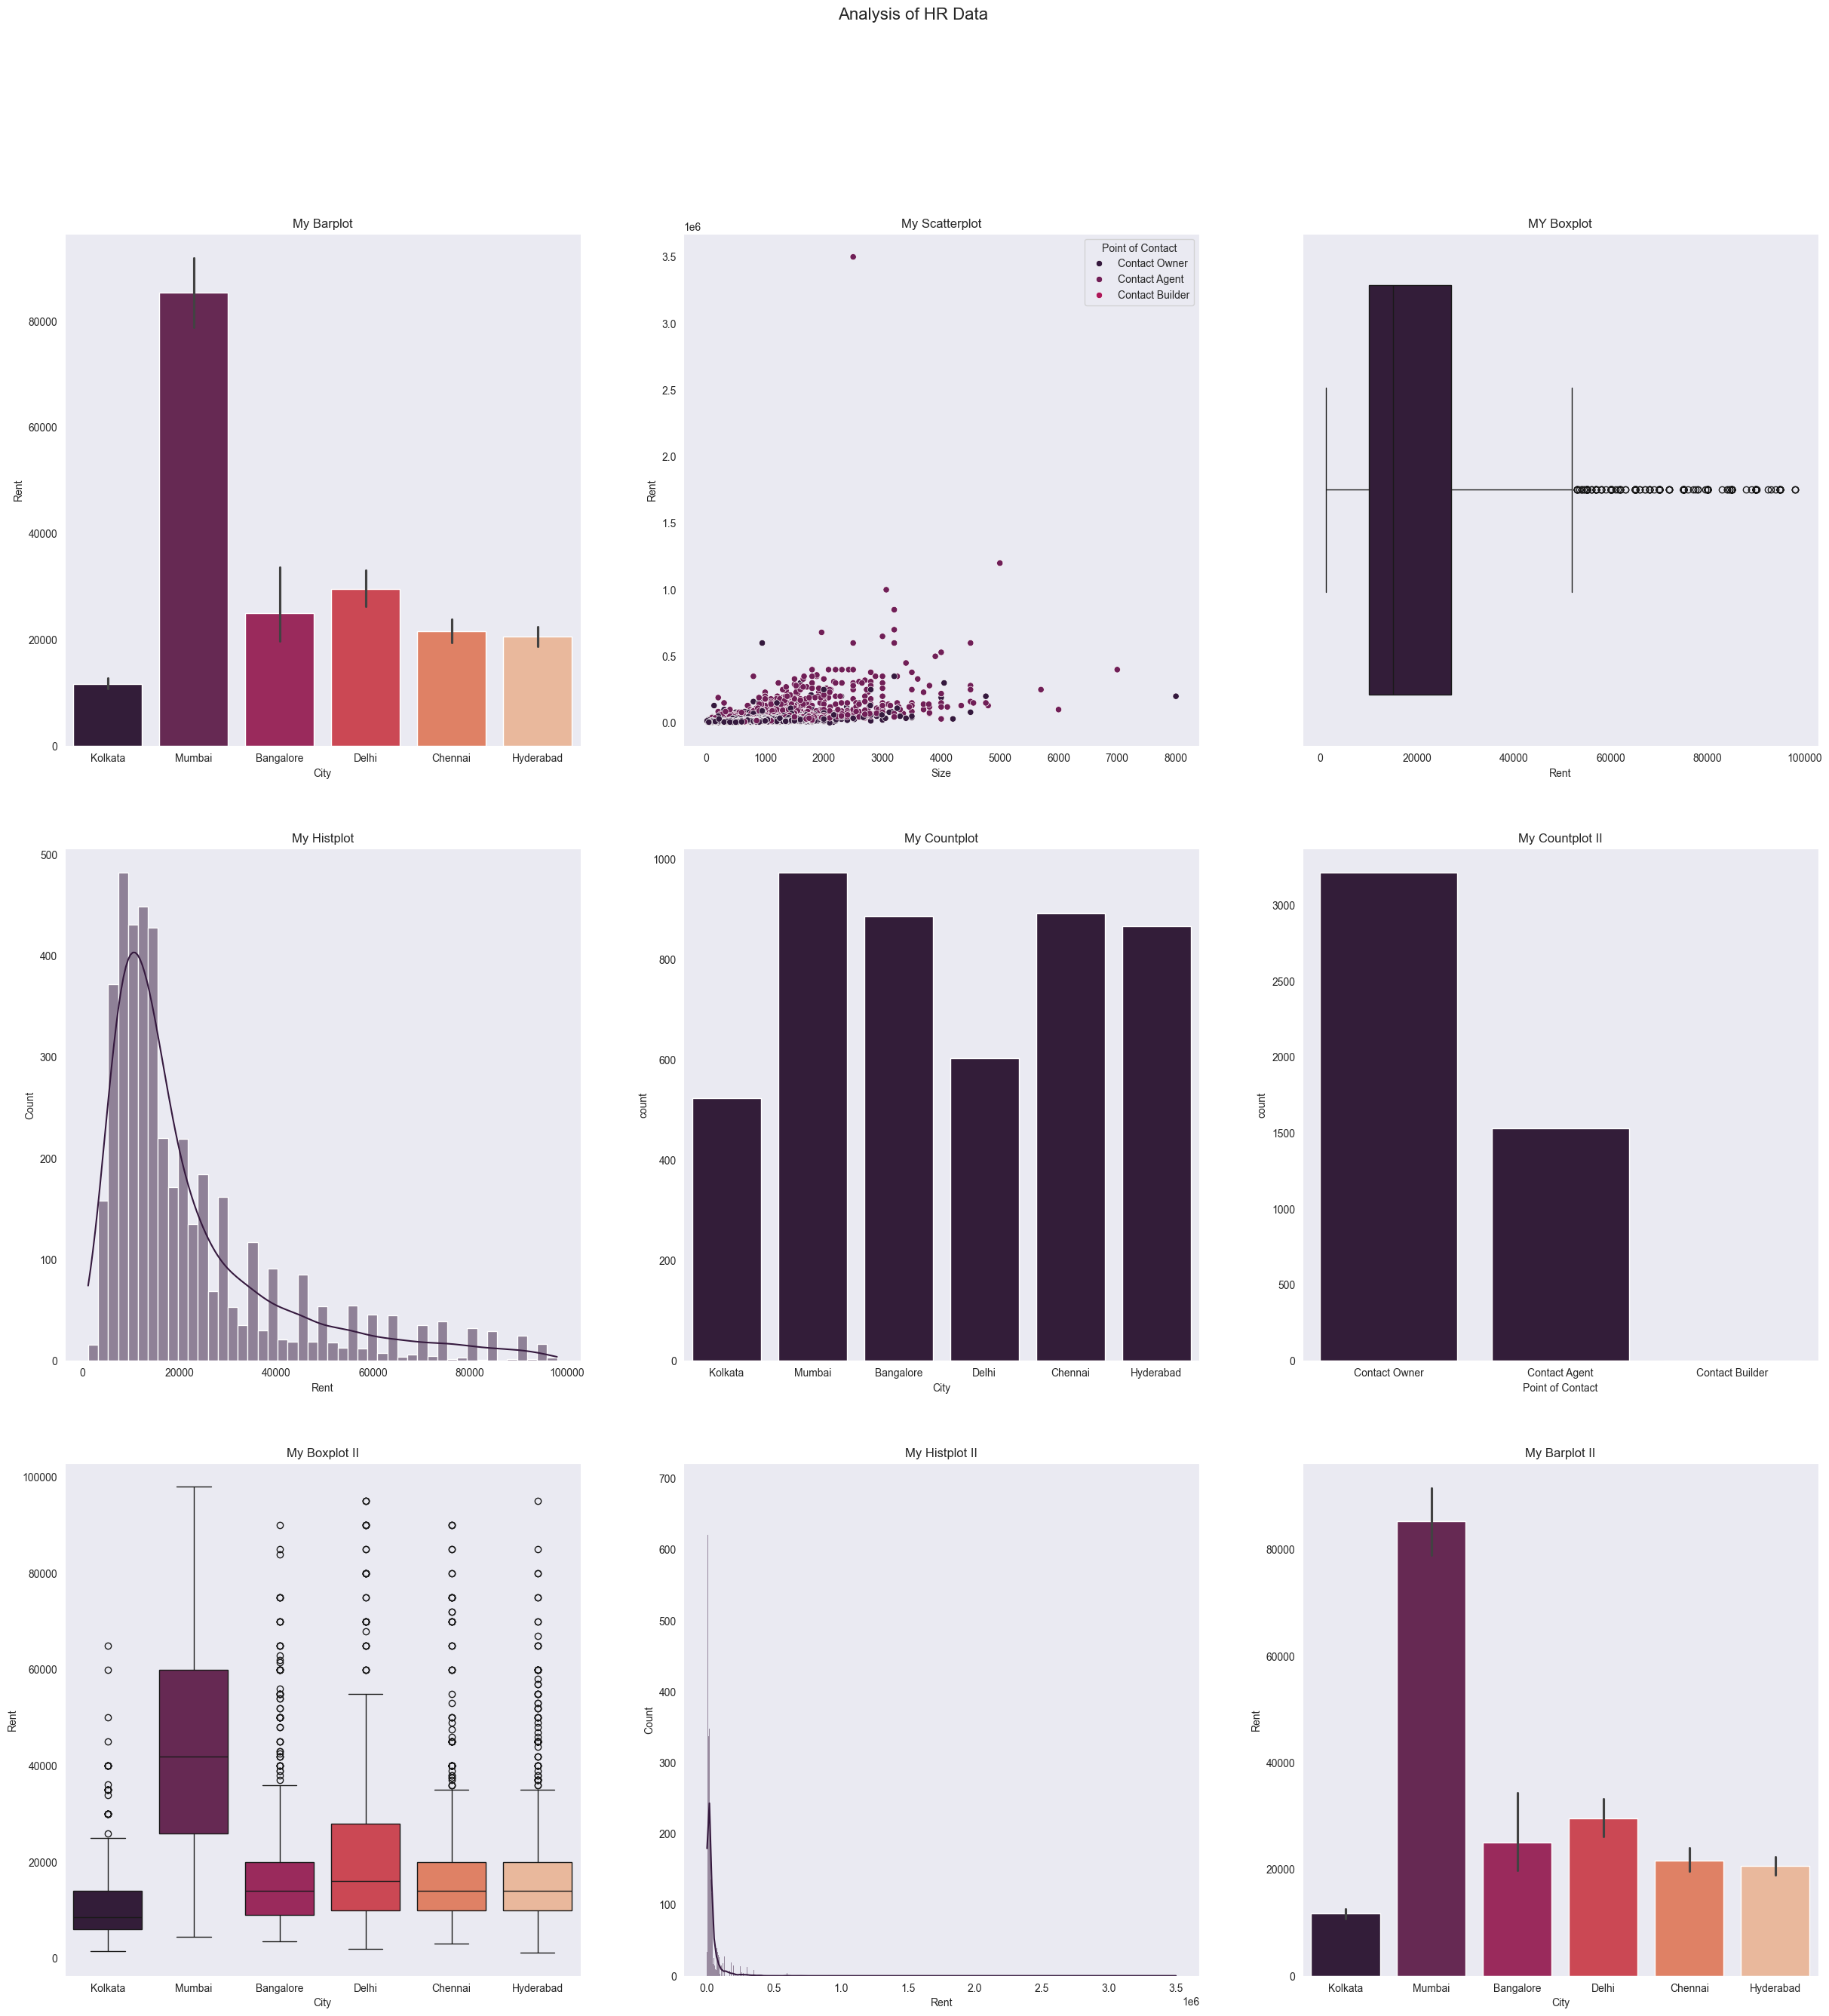

In [32]:
sns.set_style('dark')
sns.set_palette('rocket')
fig, axes = plt.subplots(3,3, figsize=(30,30)) #Y-AXIS, X-AXIS
fig.suptitle('Analysis of HR Data', fontsize=16)

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0]).set_title('My Barplot')
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1]).set_title('My Scatterplot')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[0,2]).set_title('MY Boxplot')
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,0]).set_title('My Histplot')
sns.countplot(data=HR_data, x = 'City', ax=axes[1,1]).set_title('My Countplot')
sns.countplot(data=HR_data, x='Point of Contact', ax=axes[1,2]).set_title('My Countplot II')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000],y='Rent',x='City',hue='City', ax=axes[2,0]).set_title('My Boxplot II')
sns.histplot(data=HR_data, x = 'Rent',kde=True, ax=axes[2,1]).set_title('My Histplot II')
sns.barplot(data = HR_data, x = 'City', y= 'Rent', hue = 'City', ax=axes[2,2]).set_title('My Barplot II')

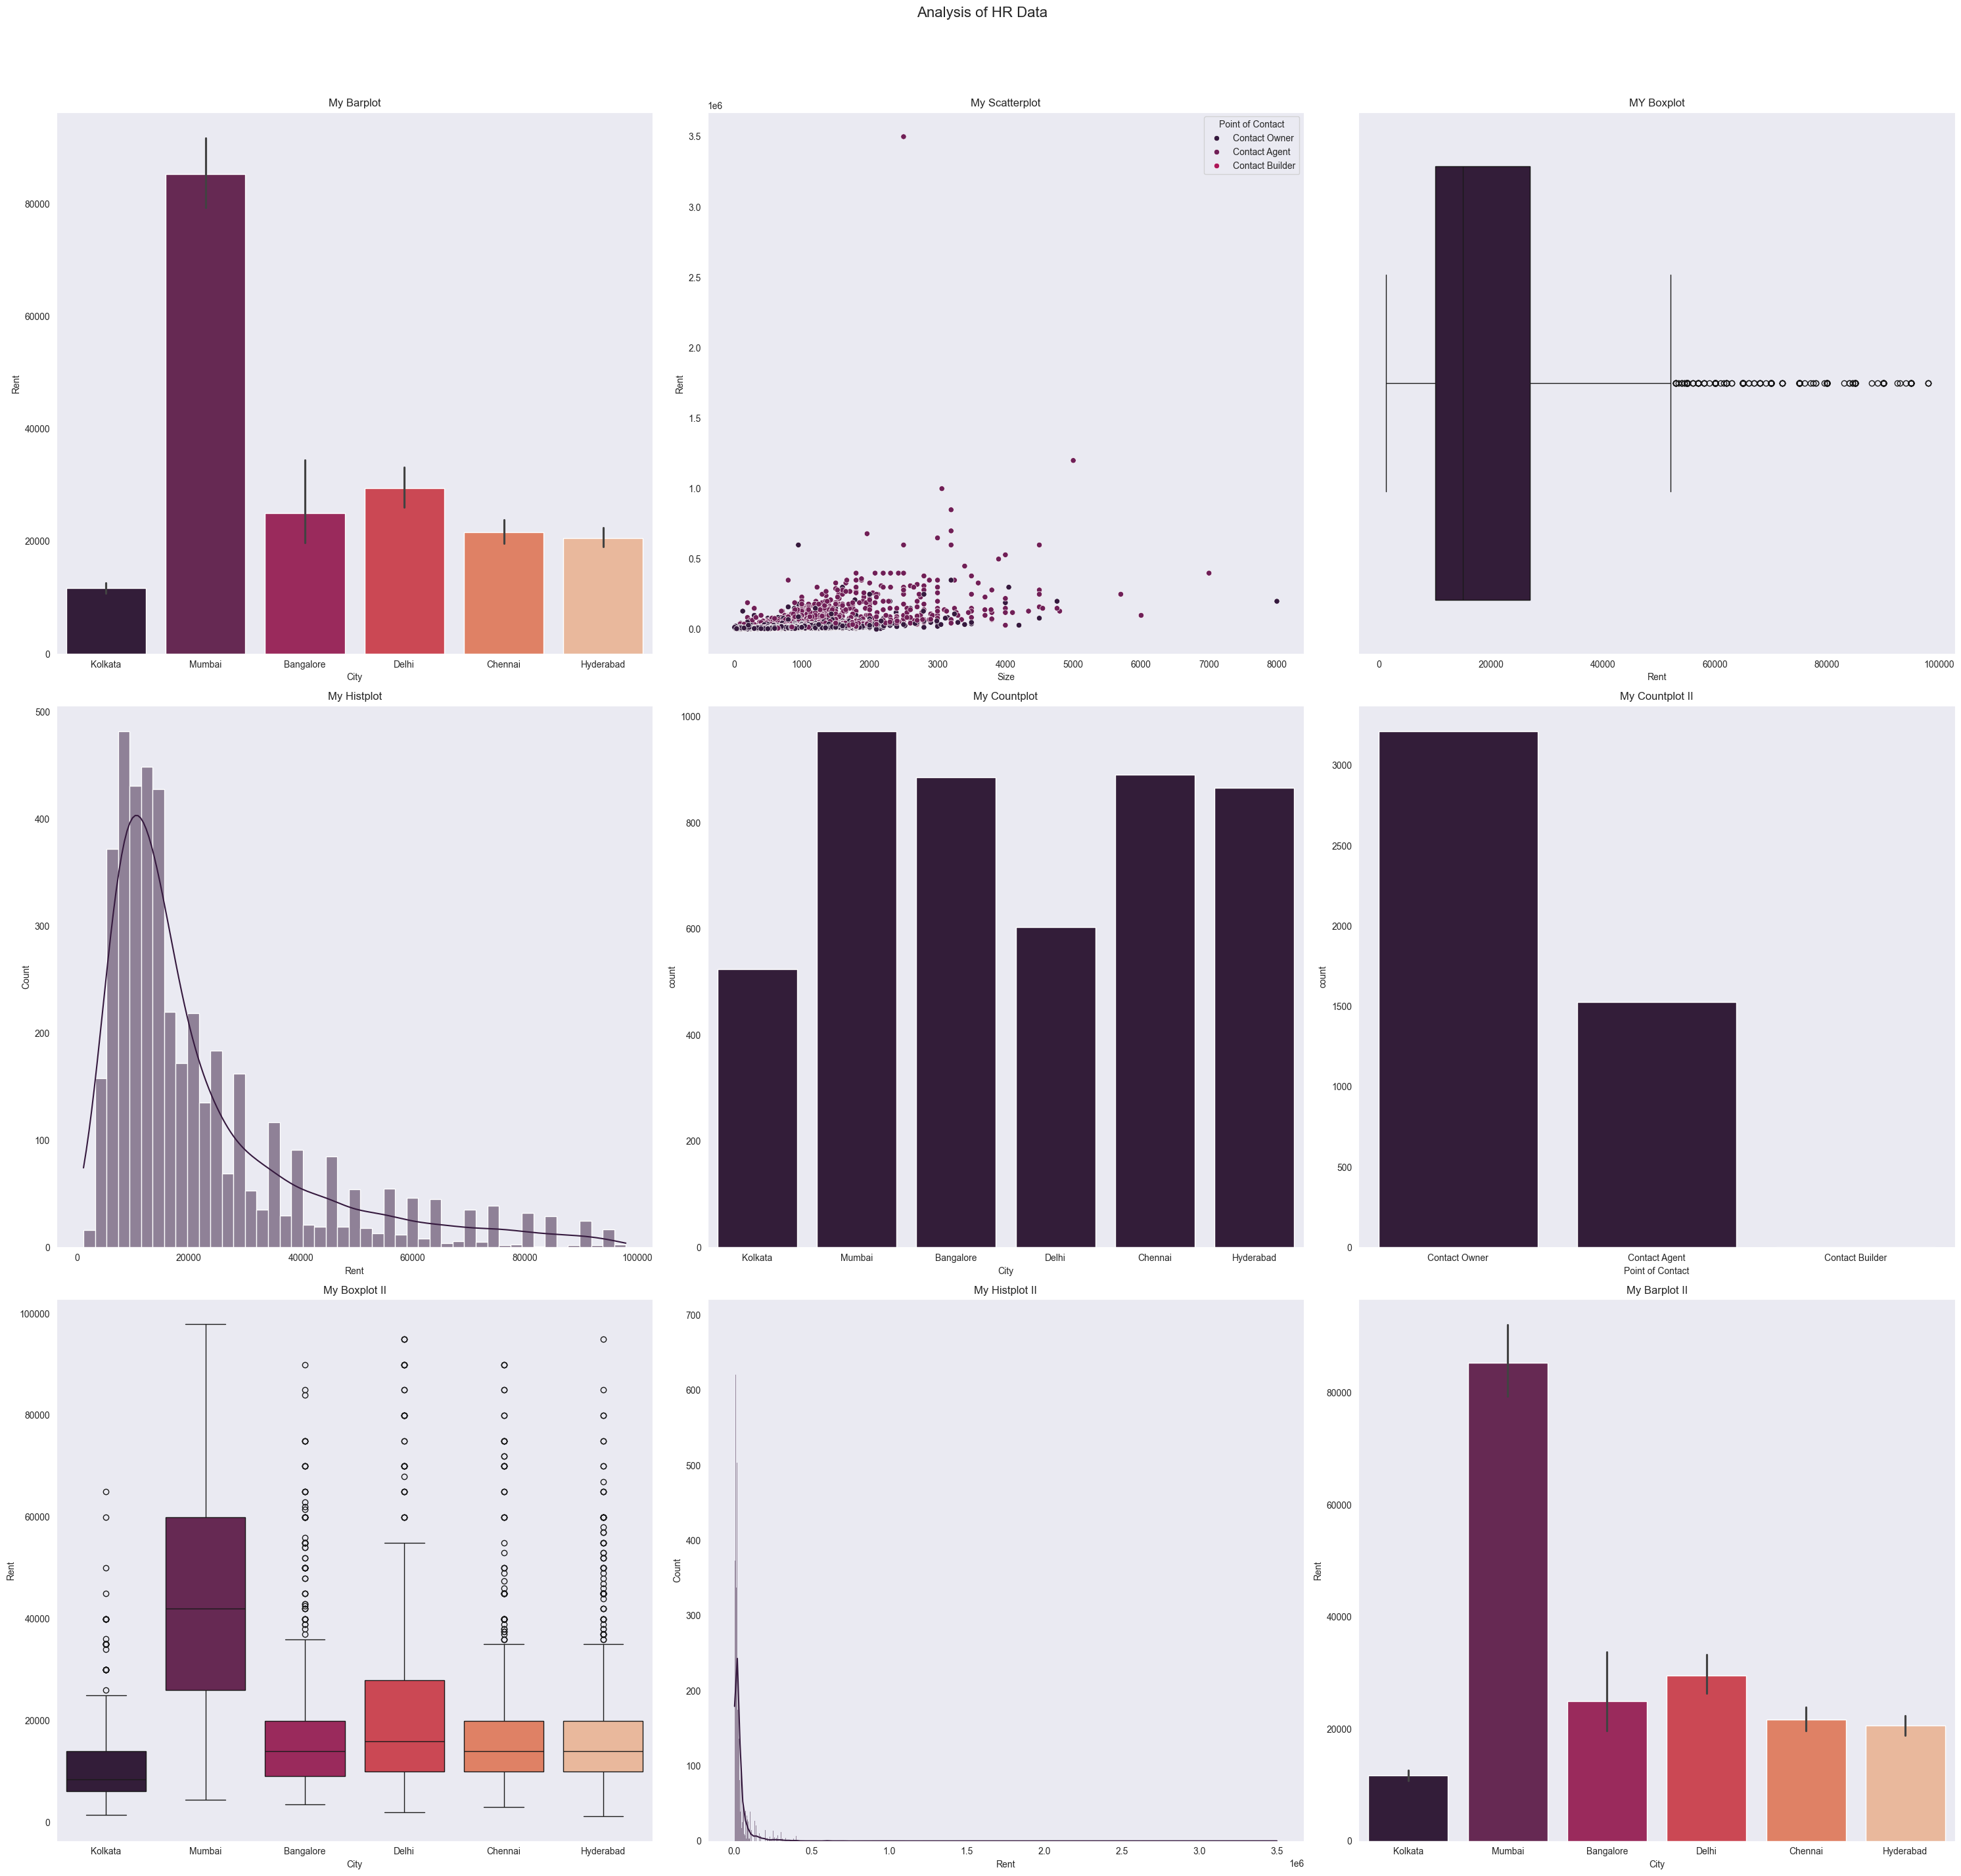

In [33]:
sns.set_style('dark')
sns.set_palette('rocket')
fig, axes = plt.subplots(3,3, figsize=(30,30)) #Y-AXIS, X-AXIS
fig.suptitle('Analysis of HR Data', fontsize=16)

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0]).set_title('My Barplot')
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1]).set_title('My Scatterplot')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[0,2]).set_title('MY Boxplot')
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,0]).set_title('My Histplot')
sns.countplot(data=HR_data, x = 'City', ax=axes[1,1]).set_title('My Countplot')
sns.countplot(data=HR_data, x='Point of Contact', ax=axes[1,2]).set_title('My Countplot II')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000],y='Rent',x='City',hue='City', ax=axes[2,0]).set_title('My Boxplot II')
sns.histplot(data=HR_data, x = 'Rent',kde=True, ax=axes[2,1]).set_title('My Histplot II')
sns.barplot(data = HR_data, x = 'City', y= 'Rent', hue = 'City', ax=axes[2,2]).set_title('My Barplot II')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

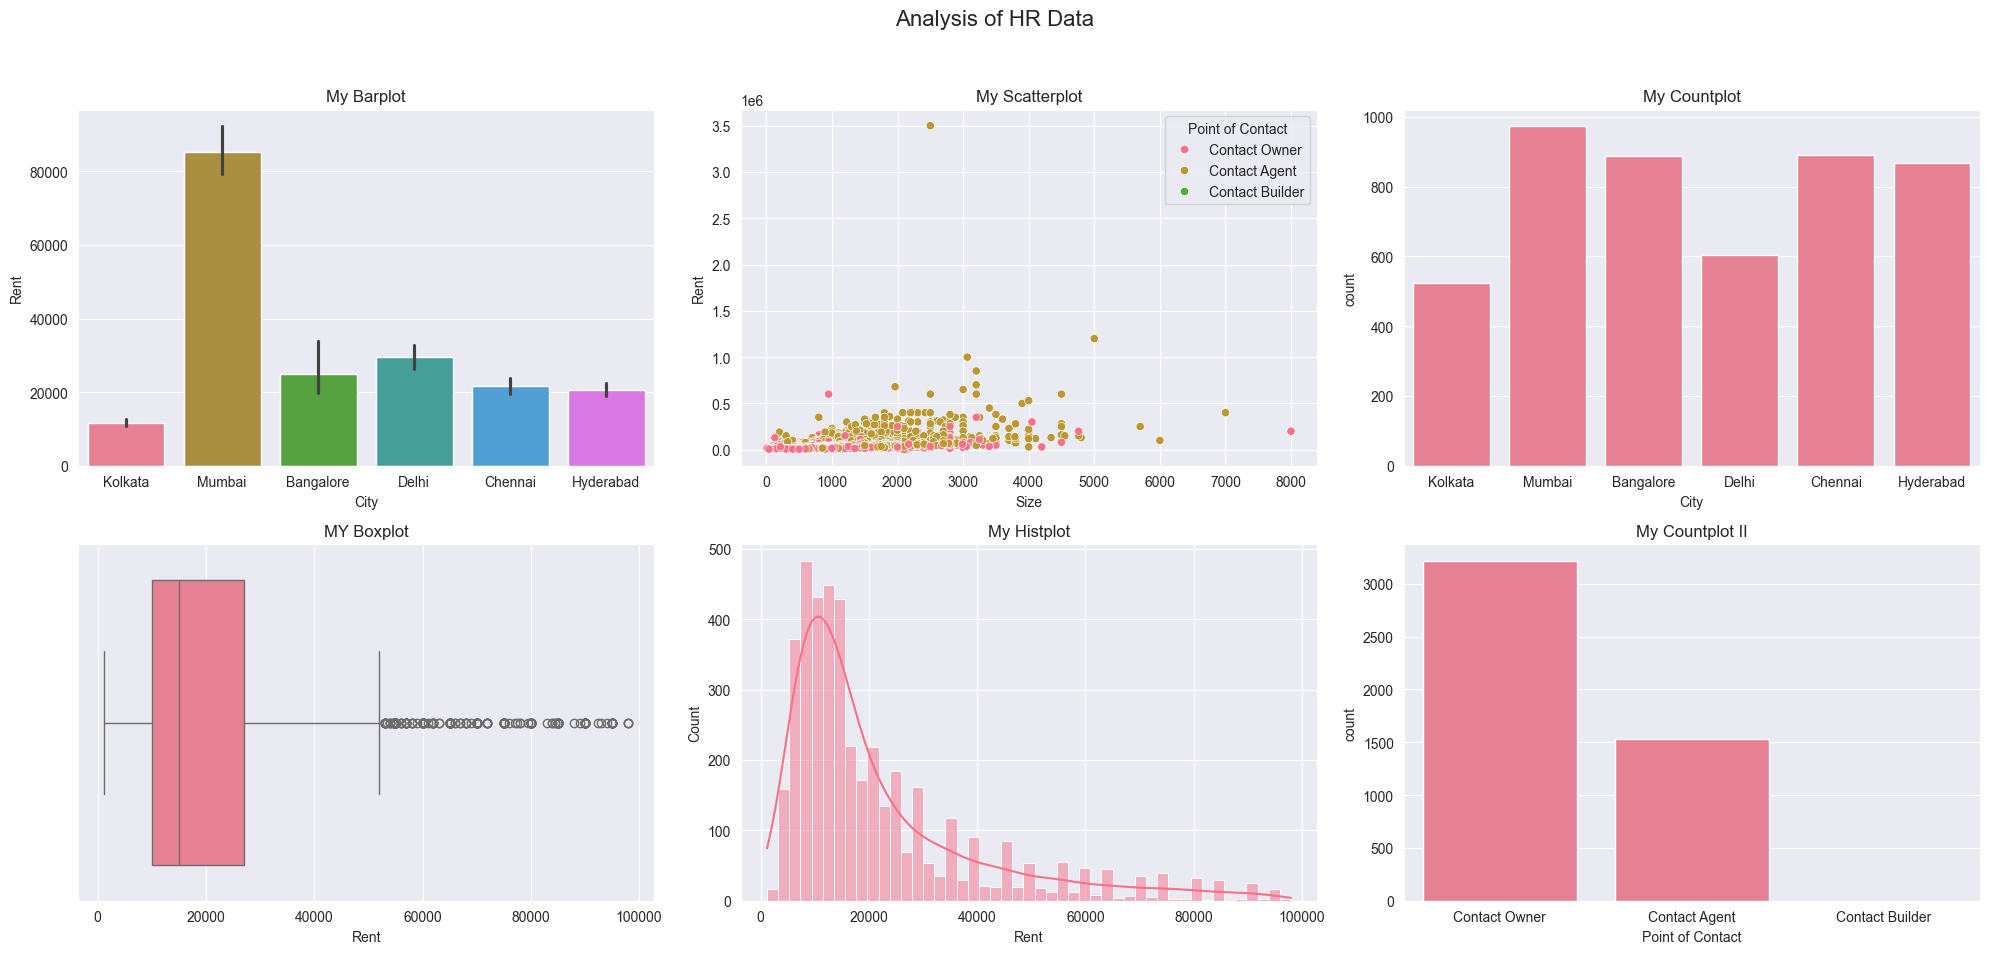

In [37]:


sns.set_style('darkgrid')
sns.set_palette('husl')
fig, axes = plt.subplots(2,3, figsize=(20,10)) #Y-AXIS, X-AXIS
fig.suptitle('Analysis of HR Data', fontsize=16)

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0]).set_title('My Barplot')
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1]).set_title('My Scatterplot')
sns.boxplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[1,0]).set_title('MY Boxplot')
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,1]).set_title('My Histplot')
sns.countplot(data=HR_data, x = 'City', ax=axes[0,2]).set_title('My Countplot')
sns.countplot(data=HR_data, x='Point of Contact', ax=axes[1,2]).set_title('My Countplot II')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [39]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=('Histttog 1','Histttog 11','Histttog','Histogram Chart of Rent in each city',
'Bar Chart','Boxxxxxxx','Display Rent lesser than 100000','Display Rent lesser than 100000 per city'))

hist1 = px.histogram(data_frame=HR_data, x='City',y='Rent',title='Histttog 1')
for trace in hist1.data:
    fig.add_trace(trace, row=1, col=1)
hist2 = px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact',title='Histttog 11')
for trace in hist2.data:
    fig.add_trace(trace, row=1, col=2)
hist3 = px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact',barmode='group',
title='Histttog')
for trace in hist3.data:
    fig.add_trace(trace, row=1, col=3)
hist4 = px.histogram(data_frame=HR_data, x='City',y='Rent',color='Point of Contact',barmode='group',
histfunc = 'avg', title = 'Histogram Chart of Rent in each city')
for trace in hist4.data:
    fig.add_trace(trace, row=2, col=1)
scatter = px.scatter(data_frame=HR_data, x='Size', y='Rent',title='Scatter Plot of Size VS Rent',color='Point of Contact')
for trace in scatter.data:
    fig.add_trace(trace, row=2, col=2)
bar_chart = px.bar(HR_data, x='City', y='Rent',title='Bar Chart')
for trace in bar_chart.data:
    fig.add_trace(trace, row=2, col=3)
box1 = px.box(data_frame=HR_data,x='Rent',title='Boxxxxxxx')
for trace in box1.data:
    fig.add_trace(trace, row=3, col=1)
box2 = px.box(data_frame=HR_data[HR_data['Rent'] < 100000], x = 'Rent',title='Display Rent lesser than 100000')
for trace in box2.data:
    fig.add_trace(trace, row=3, col=2)
box3 = px.box(data_frame=HR_data[HR_data['Rent'] < 100000], y='Rent',x='City',color='City',
title='Display Rent lesser than 100000 per city')
for trace in box3.data:
    fig.add_trace(trace, row=3, col=3)

fig.update_layout(height=900, width=1200, title_text="Multiple Charts with Plotly")
plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
paper_bgcolor='white',  # Grey background for the paper
font=dict(family='Arial, sans-serif',size=14,color='black'),
title=dict(font=dict(size=20))

fig.show()


In [36]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=(
    'Histttog 1', 'Histttog 11', 'Histttog', 'Histogram Chart of Rent in each city',
    'Scatter Plot of Size VS Rent', 'Bar Chart', 'Boxxxxxxx', 
    'Display Rent lesser than 100000', 'Display Rent lesser than 100000 per city'))

# Add histogram 1
hist1 = px.histogram(data_frame=HR_data, x='City', y='Rent', title='Histttog 1')
for trace in hist1.data:
    fig.add_trace(trace, row=1, col=1)

# Add histogram 2
hist2 = px.histogram(data_frame=HR_data, x='City', y='Rent', color='Point of Contact', title='Histttog 11')
for trace in hist2.data:
    fig.add_trace(trace, row=1, col=2)

# Add histogram 3
hist3 = px.histogram(data_frame=HR_data, x='City', y='Rent', color='Point of Contact', barmode='group', title='Histttog')
for trace in hist3.data:
    fig.add_trace(trace, row=1, col=3)

# Add histogram 4
hist4 = px.histogram(data_frame=HR_data, x='City', y='Rent', color='Point of Contact', barmode='group', histfunc='avg', title='Histogram Chart of Rent in each city')
for trace in hist4.data:
    fig.add_trace(trace, row=2, col=1)

# Add scatter plot
scatter = px.scatter(data_frame=HR_data, x='Size', y='Rent', title='Scatter Plot of Size VS Rent', color='Point of Contact')
for trace in scatter.data:
    fig.add_trace(trace, row=2, col=2)

# Add bar chart
bar_chart = px.bar(HR_data, x='City', y='Rent', title='Bar Chart')
for trace in bar_chart.data:
    fig.add_trace(trace, row=2, col=3)

# Add box plot 1
box1 = px.box(data_frame=HR_data, x='Rent', title='Boxxxxxxx')
for trace in box1.data:
    fig.add_trace(trace, row=3, col=1)

# Add box plot 2
box2 = px.box(data_frame=HR_data[HR_data['Rent'] < 100000], x='Rent', title='Display Rent lesser than 100000')
for trace in box2.data:
    fig.add_trace(trace, row=3, col=2)

# Add box plot 3
box3 = px.box(data_frame=HR_data[HR_data['Rent'] < 100000], y='Rent', x='City', color='City', title='Display Rent lesser than 100000 per city')
for trace in box3.data:
    fig.add_trace(trace, row=3, col=3)

# Update layout
fig.update_layout(
    height=900, 
    width=1200, 
    title_text="Multiple Charts with Plotly",
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    paper_bgcolor='lightgrey',  # Grey background for the paper
    font=dict(family='Arial, sans-serif', size=14, color='black'),
    title=dict(font=dict(size=20))
)

fig.show()


Text(0.5, 1.0, 'My Violinplot')

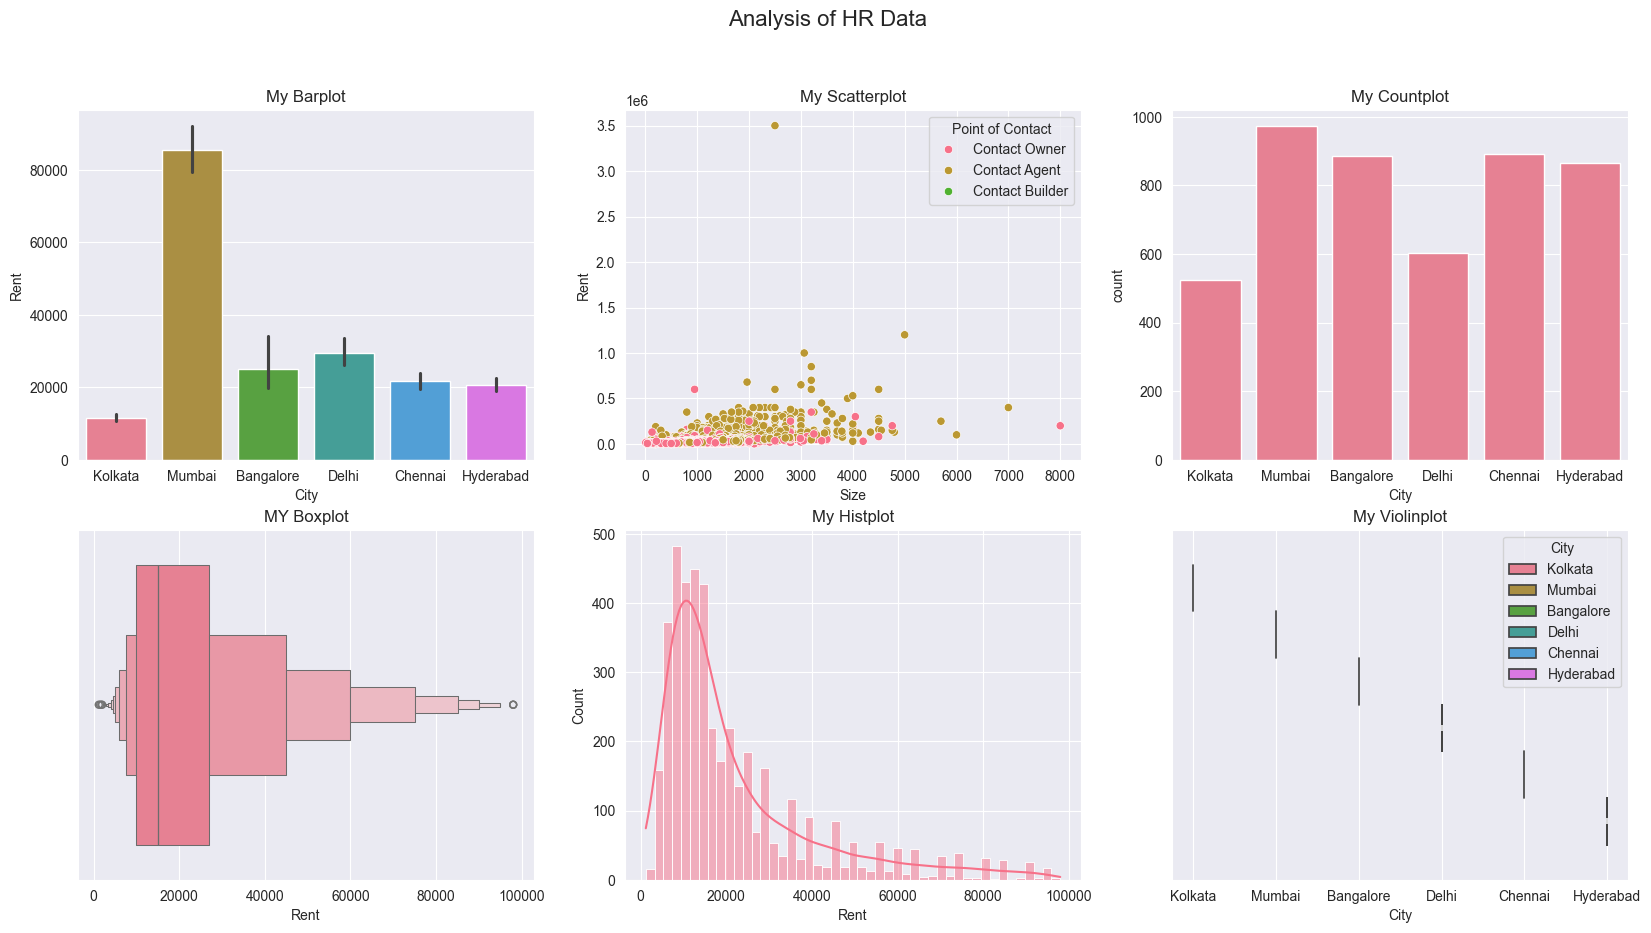

In [42]:
sns.set_style('darkgrid')
sns.set_palette('husl')
fig, axes = plt.subplots(2,3, figsize=(20,10)) #Y-AXIS, X-AXIS
fig.suptitle('Analysis of HR Data', fontsize=16)

sns.barplot(data=HR_data, x = 'City', y='Rent', hue='City', ax=axes[0,0]).set_title('My Barplot')
sns.scatterplot(data=HR_data, x='Size', y='Rent', hue='Point of Contact', ax=axes[0,1]).set_title('My Scatterplot')
sns.boxenplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', ax=axes[1,0]).set_title('MY Boxplot')
sns.histplot(data=HR_data[HR_data['Rent'] < 100000], x='Rent', kde= True,ax=axes[1,1]).set_title('My Histplot')
sns.countplot(data=HR_data, x = 'City', ax=axes[0,2]).set_title('My Countplot')
sns.violinplot(data=HR_data[HR_data['Size'] < 100000], x='City', hue='City',ax=axes[1,2]).set_title('My Violinplot')